In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from dotenv import load_dotenv
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Get API Key from Env variable and token to make future requests

In [3]:
# Set environment variables from the .env in the local environment
load_dotenv("Chartmetrics_API_KEY.env")

# Retrieve API key and store as Python variable
refresh_api_token = os.getenv("CHARTMETRICS_KEY")
print(refresh_api_token)

s2EGVWtdh5Vc2QnqG0RLcBdln6Zyfpk3vwBB6ibTawlT1LJoJisbjRtsyKVADaCA


In [4]:
post_request_url = "https://api.chartmetric.com/api/token"

post_results = requests.post(post_request_url, data = {"refreshtoken":refresh_api_token}, json=True)
api_token = post_results.json()['token']

In [5]:
post_results

<Response [200]>

## Spotify artists

In [6]:
date = '2024-07-01'
chart_type = 'popularity'
interval = 'daily'

spotify_artists_url = f"https://api.chartmetric.com/api/charts/spotify/artists?date={date}&type={chart_type}&interval={interval}"

headers = {"Authorization": f"Bearer {api_token}"}

spotify_artists_results = requests.get(spotify_artists_url, headers = headers)

In [7]:
spotify_artists_results

<Response [200]>

In [8]:
artists_df = pd.json_normalize(spotify_artists_results.json()['obj']['data'])
artists_df.head()

,id,name,image_url,isni,code2,hometown_city,verified,current_city,sp_followers,sp_popularity,...,popularity,rank,change,velocity,streak,created_at,peak_date,peak_rank,time_on_chart,rankStats
0,2762,Taylor Swift,https://share.chartmetric.com/artists/299/172/...,0000000078519858,US,Reading,True,None,115247019.0,100.0,...,100,1,0,0.000000,78,2024-07-01 08:58:49.864,2024-07-01,1,2273,"[{'date': '2024-06-18', 'rank': 1}, {'date': '..."
1,5596,Billie Eilish,https://i.scdn.co/image/ab67616100005174d8b998...,000000046748058X,US,Los Angeles,False,None,96088607.0,94.0,...,94,2,0,0.000000,78,2024-07-01 08:58:49.864,2019-06-28,1,2271,"[{'date': '2024-06-18', 'rank': 2}, {'date': '..."
2,3380,Drake,https://i.scdn.co/image/ab67616100005174429338...,000000012032246X,CA,Toronto,False,None,89671017.0,94.0,...,94,3,0,0.000000,78,2024-07-01 08:58:49.864,2021-11-16,1,2277,"[{'date': '2024-06-18', 'rank': 3}, {'date': '..."
3,3852,The Weeknd,https://i.scdn.co/image/ab6761610000e5eb214f3c...,0000000382556637,CA,Toronto,False,None,86084001.0,93.0,...,93,4,0,0.000000,78,2024-07-01 08:58:49.864,2023-03-22,1,2265,"[{'date': '2024-06-18', 'rank': 5}, {'date': '..."
4,214945,Bad Bunny,https://i.scdn.co/image/ab6761610000e5eb9ad50e...,0000000466373221,PR,Vega Baja,True,None,83477493.0,94.0,...,93,5,0,0.000000,78,2024-07-01 08:58:49.864,2023-03-20,1,2267,"[{'date': '2024-06-18', 'rank': 4}, {'date': '..."


In [9]:
artists_df.shape

(200, 30)

In [10]:
top_100_artists_df = artists_df[artists_df['rank'] < 101].copy()

#### Export df to CSV

In [11]:
artists_df.to_csv('CSVs/artist_df.csv', index=False)

### Visuals

In [12]:
artists_df.dtypes

id                        int64
name                     object
image_url                object
isni                     object
code2                    object
hometown_city            object
verified                   bool
current_city             object
sp_followers            float64
sp_popularity           float64
sp_monthly_listeners    float64
deezer_fans             float64
cm_artist_rank          float64
cm_artist_score         float64
tags                     object
spotify_artist_ids       object
itunes_artist_ids        object
deezer_artist_ids        object
amazon_artist_ids        object
timestp                  object
popularity                int64
rank                      int64
change                   object
velocity                 object
streak                    int64
created_at               object
peak_date                object
peak_rank                 int64
time_on_chart             int64
rankStats                object
dtype: object

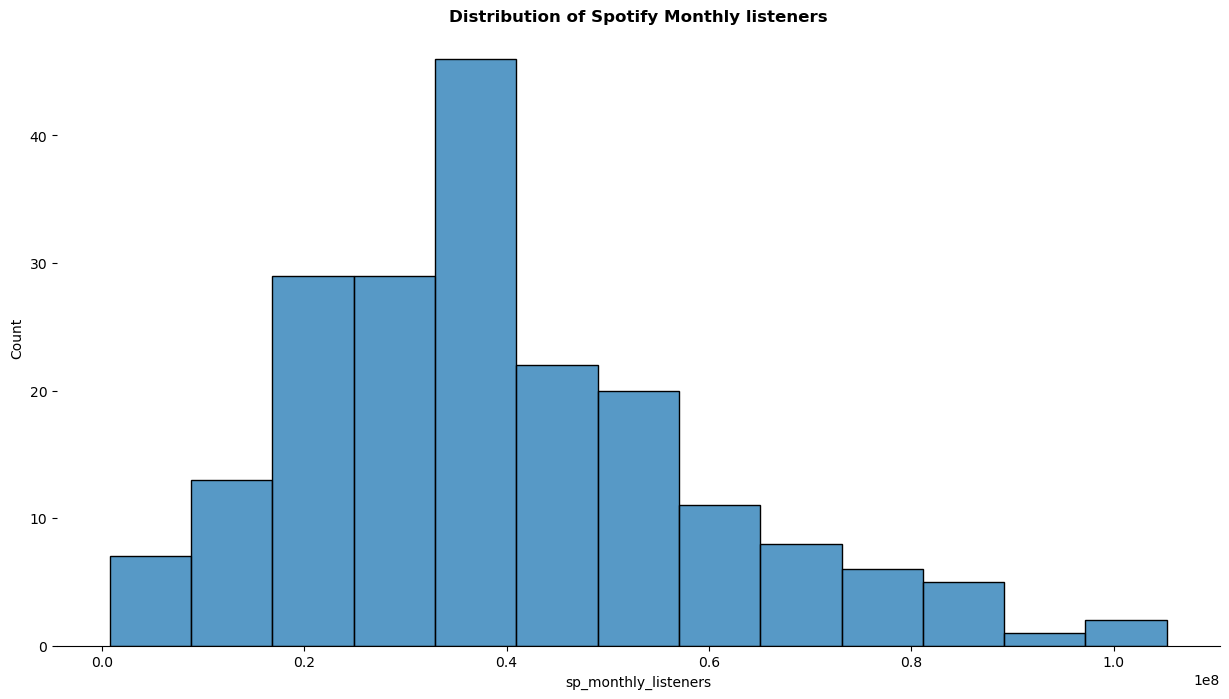

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.histplot(x = 'sp_monthly_listeners', data = artists_df)

plt.title('Distribution of Spotify Monthly listeners', fontweight='bold')

plt.show()

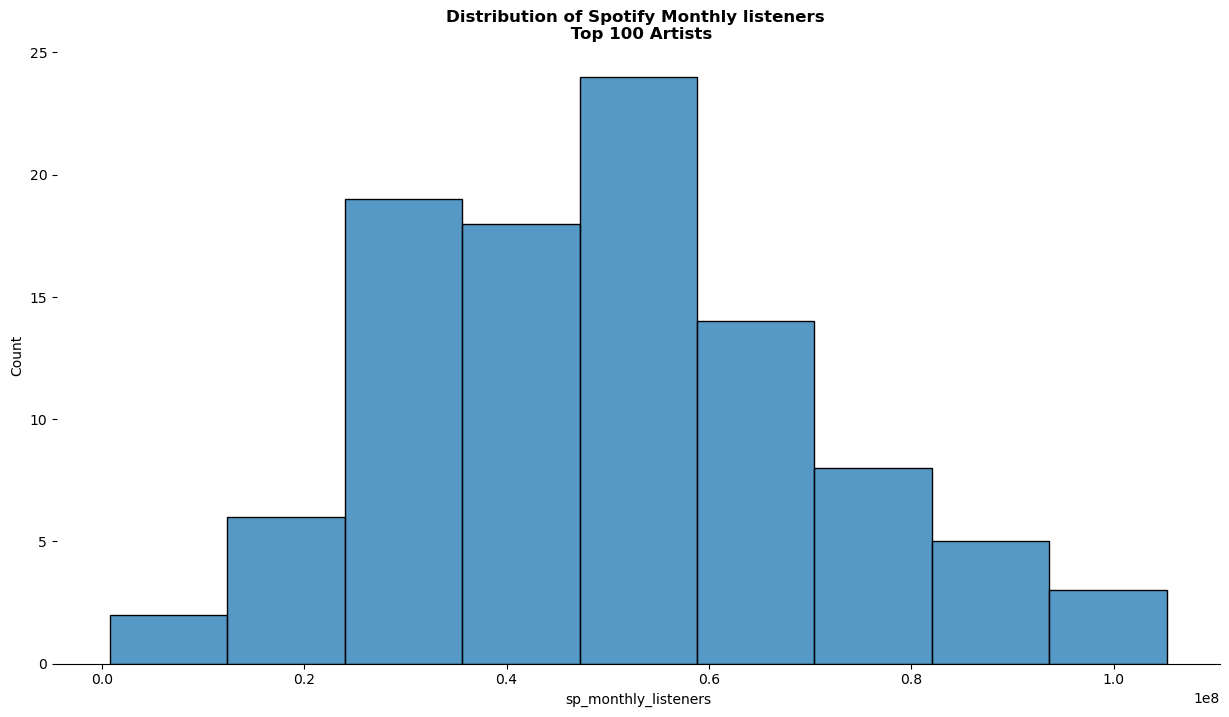

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.histplot(x = 'sp_monthly_listeners', data = top_100_artists_df)

plt.title('Distribution of Spotify Monthly listeners \n Top 100 Artists', fontweight='bold')

plt.show()

## Spotify Tracks

In [15]:
date = '2024-07-01'
chart_type = 'regional'
interval = 'daily'
country_code = 'US'

spotify_tracks_url = f"https://api.chartmetric.com/api/charts/spotify?date={date}&type={chart_type}&interval={interval}&country_code={country_code}"

headers = {"Authorization": f"Bearer {api_token}"}

spotify_tracks_results = requests.get(spotify_tracks_url, headers = headers)

In [16]:
spotify_tracks_results

<Response [200]>

In [17]:
tracks_df = pd.json_normalize(spotify_tracks_results.json()['obj']['data'])
tracks_df.head()

,id,name,isrc,spotify_track_id,spotify_album_id,image_url,spotify_popularity,cm_track,spotify_artist_names,track_genre,...,chart_name,current_plays,code2,spotify,velocity,pre_rank,peak_rank,peak_date,time_on_chart,rankStats
0,140970481,Please Please Please,USUM72404101,5N3hjp1WNayUPZrA8kJmJP,5bBaoign62r1i7OV8w7mi9,https://i.scdn.co/image/ab67616d0000b273de84ad...,98,122336328,[Sabrina Carpenter],"dance pop,electropop,pop,post-teen pop,viral pop",...,REGIONAL DAILY,None,US,140970481,0.000000,1,1,2024-06-10T00:00:00.000Z,25,"[{'plays': None, 'rank': 1, 'timestp': '2024-0..."
1,138255539,Not Like Us,USUG12400910,6AI3ezQ4o3HUoP6Dhudph3,5JjnoGJyOxfSZUZtk2rRwZ,https://i.scdn.co/image/ab67616d0000b2731ea0c6...,97,120189440,[Kendrick Lamar],"conscious hip hop,hip hop,pop rap,rap,west coa...",...,REGIONAL DAILY,None,US,138255539,0.000000,2,1,2024-05-06T00:00:00.000Z,57,"[{'plays': None, 'rank': 2, 'timestp': '2024-0..."
2,139556669,A Bar Song (Tipsy),USUYG1541249,5fZJQrFKWQLb7FpJXZ1g7K,0DLvFVIfwt3OHdK9kGeEM3,https://i.scdn.co/image/ab67616d0000b27380d86d...,88,118969192,[Shaboozey],pop rap,...,REGIONAL DAILY,None,US,139556669,0.428571,3,1,2024-07-05T00:00:00.000Z,31,"[{'plays': None, 'rank': 6, 'timestp': '2024-0..."
3,137338334,Espresso,USUM72403305,2qSkIjg1o9h3YT9RAgYN75,5quMTd5zeI9yW5UDua8wS4,https://i.scdn.co/image/ab67616d0000b273659cd4...,99,118981138,[Sabrina Carpenter],"dance pop,electropop,pop,post-teen pop,viral pop",...,REGIONAL DAILY,None,US,137338334,-0.142857,4,1,2024-04-30T00:00:00.000Z,81,"[{'plays': None, 'rank': 3, 'timestp': '2024-0..."
4,138330270,I Had Some Help (feat. Morgan Wallen),USUM72404990,7221xIgOnuakPdLqT0F3nP,1woYXxyyxTQJ0E0AhZE6mj,https://is1-ssl.mzstatic.com/image/thumb/Music...,95,120372551,"[Post Malone, Morgan Wallen]","dfw rap,melodic rap,pop,rap,contemporary count...",...,REGIONAL DAILY,None,US,138330270,-0.142857,5,1,2024-05-11T00:00:00.000Z,52,"[{'plays': None, 'rank': 4, 'timestp': '2024-0..."


In [18]:
tracks_df.shape

(50, 45)

In [19]:
tracks_df.dtypes

id                        int64
name                     object
isrc                     object
spotify_track_id         object
spotify_album_id         object
image_url                object
spotify_popularity        int64
cm_track                  int64
spotify_artist_names     object
track_genre              object
cm_artist                object
artist_names             object
code2s                   object
artist_images            object
artist_covers            object
spotify_artist_ids       object
spotify_track_ids        object
spotify_album_ids        object
spotify_duration_ms       int64
album_ids                object
album_names              object
album_upc                object
album_label              object
release_dates            object
composer_name            object
album                    object
duration_ms               int64
explicit                   bool
score                   float64
songwriter               object
artists                  object
rank    

#### Export tracks to CSV

In [20]:
tracks_df.to_csv('CSVs/tracks_df.csv',index=False)

### Visuals

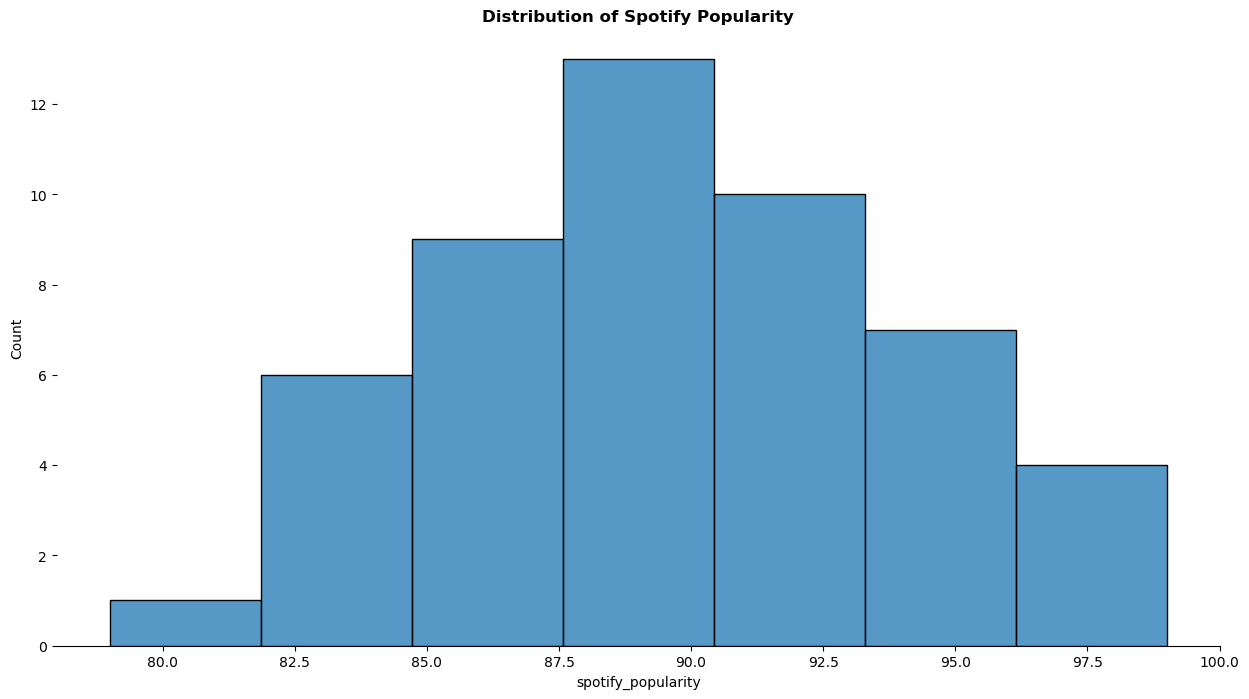

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.histplot(x = 'spotify_popularity', data = tracks_df)

plt.title('Distribution of Spotify Popularity', fontweight='bold')

plt.show()

## YouTube tracks

In [22]:
country_code = 'US'
date = '2024-06-27'

youtube_tracks_url = f"https://api.chartmetric.com/api/charts/youtube/tracks?country_code={country_code}&date={date}"

headers = {"Authorization": f"Bearer {api_token}"}

youtube_tracks_results = requests.get(youtube_tracks_url, headers = headers)

In [23]:
youtube_tracks_results

<Response [200]>

In [24]:
youtube_df = pd.json_normalize(youtube_tracks_results.json()['obj']['data'])
youtube_df.head()

,id,name,isrc,youtube_artist,image_url,cm_track,upload_date,license,album_names,youtube_artist_names,...,added_at,view_count,raw_data,velocity,pre_rank,peak_rank,peak_date,time_on_chart,rankStats,viewStats
0,fSMk5o9MWKM,Not Like Us,USUG12400910,/m/0g9x698,https://i.ytimg.com/vi/fSMk5o9MWKM/maxresdefau...,120189440.0,2024-05-05T07:36:05.000Z,None,[Not Like Us],[Kendrick Lamar],...,2024-06-27T00:00:00.000Z,12169849,None,0.000000,1.0,1,2024-06-20T00:00:00.000Z,2,"[{'rank': 1, 'timestp': '2024-06-20T00:00:00.0...","[{'views': 8965569, 'timestp': '2024-06-20T00:..."
1,t7bQwwqW-Hc,A Bar Song (Tipsy),USUYG1541249,/g/11b7_t9432,https://i.ytimg.com/vi/t7bQwwqW-Hc/maxresdefau...,118969192.0,2024-04-12T04:00:36.000Z,None,[A Bar Song (Tipsy)],None,...,2024-06-27T00:00:00.000Z,7779581,None,0.000000,2.0,2,2024-06-20T00:00:00.000Z,11,"[{'rank': 2, 'timestp': '2024-06-20T00:00:00.0...","[{'views': 7735131, 'timestp': '2024-06-20T00:..."
2,bUX8MDNQda4,MILLION DOLLAR BABY,QM24S2402528,/g/11h2hbdm9p,https://i.ytimg.com/vi/bUX8MDNQda4/maxresdefau...,119723065.0,2024-05-03T04:02:07.000Z,None,[Million Dollar Baby - Single],None,...,2024-06-27T00:00:00.000Z,6918255,None,0.000000,3.0,2,2024-05-30T00:00:00.000Z,5,"[{'rank': 3, 'timestp': '2024-06-20T00:00:00.0...","[{'views': 7513463, 'timestp': '2024-06-20T00:..."
3,GZ3zL7kT6_c,Lose Control (Live),USWB12302315,/g/11h763y_g9,https://i.ytimg.com/vi/GZ3zL7kT6_c/maxresdefau...,104296194.0,2023-06-23T04:00:12.000Z,None,[Lose Control],None,...,2024-06-27T00:00:00.000Z,5319690,None,0.142857,5.0,1,2024-03-07T00:00:00.000Z,44,"[{'rank': 5, 'timestp': '2024-06-20T00:00:00.0...","[{'views': 5917639, 'timestp': '2024-06-20T00:..."
4,Oa_RSwwpPaA,Beautiful Things,USWB12307016,/g/11r_mnt170,https://i.ytimg.com/vi/Oa_RSwwpPaA/maxresdefau...,116167805.0,2024-01-18T23:00:13.000Z,None,[Beautiful Things],None,...,2024-06-27T00:00:00.000Z,5193394,None,0.142857,6.0,1,2024-03-21T00:00:00.000Z,23,"[{'rank': 6, 'timestp': '2024-06-20T00:00:00.0...","[{'views': 5433504, 'timestp': '2024-06-20T00:..."


In [25]:
# Check if 'cm_track' column exists and convert it to int64
if 'cm_track' in youtube_df.columns:
    # Handling NaN values by replacing them with 0 and converting to integer
    youtube_df['cm_track'] = youtube_df['cm_track'].fillna(0).astype(int)
else:
    print("'cm_track' column not found in youtube_df")

# Display the updated DataFrame to check the changes
print("Updated DataFrame with 'cm_track' as int64:")
print(youtube_df.head())


Updated DataFrame with 'cm_track' as int64:
            id                 name          isrc youtube_artist  \
0  fSMk5o9MWKM          Not Like Us  USUG12400910     /m/0g9x698   
1  t7bQwwqW-Hc   A Bar Song (Tipsy)  USUYG1541249  /g/11b7_t9432   
2  bUX8MDNQda4  MILLION DOLLAR BABY  QM24S2402528  /g/11h2hbdm9p   
3  GZ3zL7kT6_c  Lose Control (Live)  USWB12302315  /g/11h763y_g9   
4  Oa_RSwwpPaA     Beautiful Things  USWB12307016  /g/11r_mnt170   

                                           image_url   cm_track  \
0  https://i.ytimg.com/vi/fSMk5o9MWKM/maxresdefau...  120189440   
1  https://i.ytimg.com/vi/t7bQwwqW-Hc/maxresdefau...  118969192   
2  https://i.ytimg.com/vi/bUX8MDNQda4/maxresdefau...  119723065   
3  https://i.ytimg.com/vi/GZ3zL7kT6_c/maxresdefau...  104296194   
4  https://i.ytimg.com/vi/Oa_RSwwpPaA/maxresdefau...  116167805   

                upload_date license                     album_names  \
0  2024-05-05T07:36:05.000Z    None                   [Not Like Us]   
1 

#### Export YouTube df to CSV

In [26]:
youtube_df.to_csv('CSVs/youtube_df.csv', index=False)

### Visuals

In [27]:
youtube_df.dtypes

id                           object
name                         object
isrc                         object
youtube_artist               object
image_url                    object
cm_track                      int64
upload_date                  object
license                      object
album_names                  object
youtube_artist_names         object
cm_artist                    object
artist_names                 object
code2s                       object
artist_images                object
artist_covers                object
youtube_artist_ids           object
youtube_track_ids            object
composer_name                object
album                        object
duration_ms                 float64
explicit                     object
score                       float64
songwriter                   object
spotify_popularity          float64
album_ids                    object
album_upc                    object
album_label                  object
artists                     

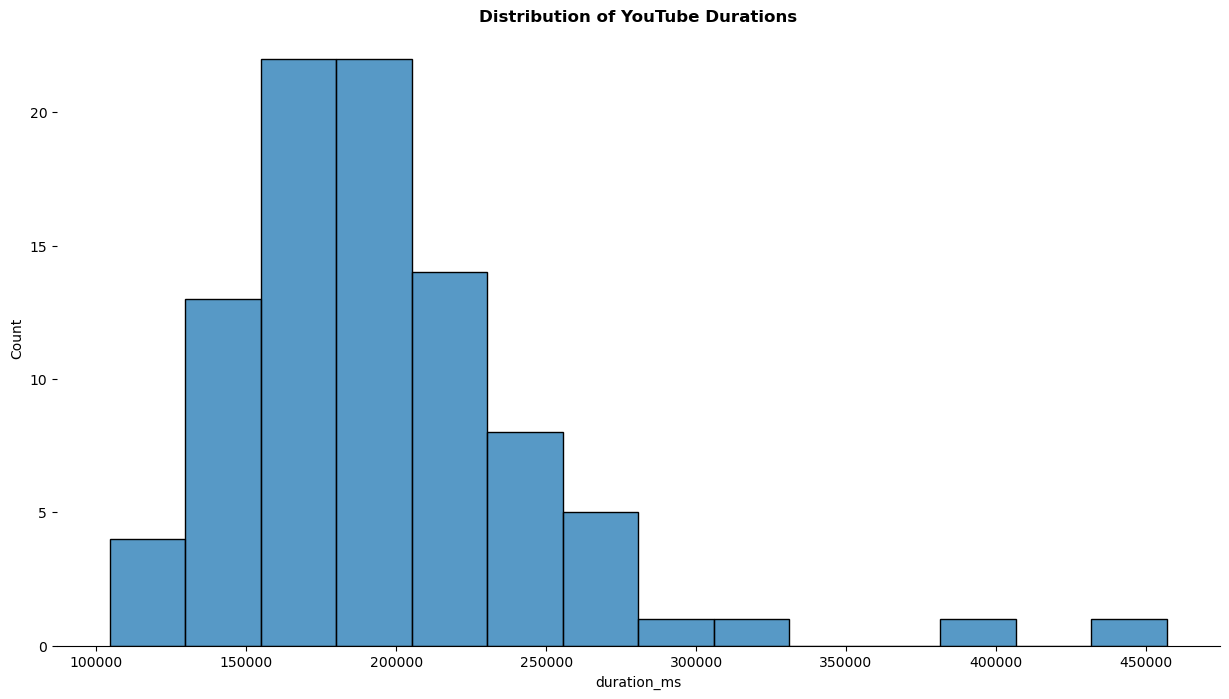

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.histplot(x = 'duration_ms', data = youtube_df)

plt.title('Distribution of YouTube Durations', fontweight='bold')

plt.show()

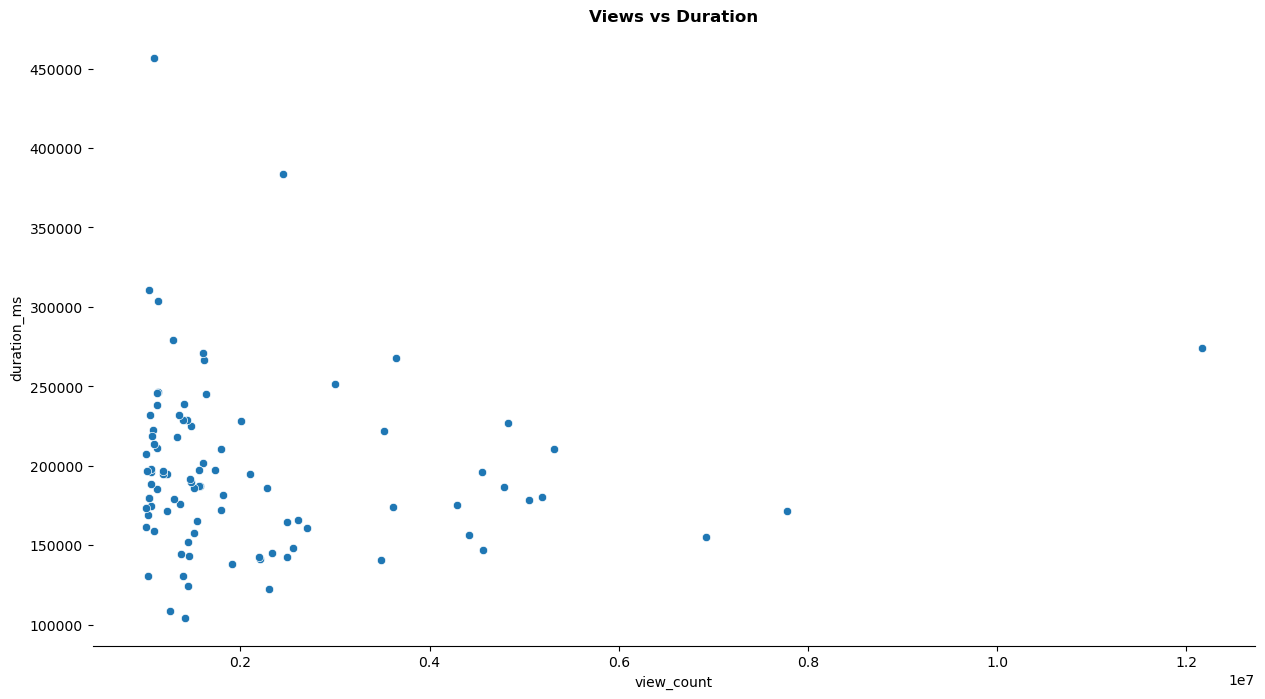

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.scatterplot(x = 'view_count',y = 'duration_ms',data = youtube_df)

plt.title('Views vs Duration', fontweight='bold')

plt.show()

## Artist Tracks

In [30]:
top_100_artist_ids = top_100_artists_df['id'].unique().tolist()

In [31]:
counter = 0

for artist_id in top_100_artist_ids:

    artist_tracks_url = f"https://api.chartmetric.com/api/artist/{artist_id}/tracks?limit=200"

    headers = {"Authorization": f"Bearer {api_token}"}

    artist_tracks_results = requests.get(artist_tracks_url, headers = headers)
    
    if top_100_artist_ids.index(artist_id) == 0:
        artist_tracks_df = pd.json_normalize(artist_tracks_results.json()['obj'])
    else:
        try:
            artist_tracks_df = pd.concat([artist_tracks_df,pd.json_normalize(artist_tracks_results.json()['obj'])],ignore_index=True) 
        except Exception as e: 
            print(f"This sucks.  Counter is at {counter}.  Artist id is {artist_id}.  Exception is: {e}")
    
    if counter % 5 == 0:
        print(f"Made it through {counter} artists...")
    
    counter += 1

Made it through 0 artists...
Made it through 5 artists...
Made it through 10 artists...
Made it through 15 artists...
Made it through 20 artists...
Made it through 25 artists...
Made it through 30 artists...
Made it through 35 artists...
Made it through 40 artists...
Made it through 45 artists...
Made it through 50 artists...
Made it through 55 artists...
Made it through 60 artists...
Made it through 65 artists...
Made it through 70 artists...
Made it through 75 artists...
Made it through 80 artists...
Made it through 85 artists...
Made it through 90 artists...
Made it through 95 artists...
This sucks.  Counter is at 98.  Artist id is 11801971.  Exception is: Expecting value: line 1 column 1 (char 0)


In [32]:
artist_tracks_df.shape

(18050, 59)

#### Export artist tracks df to CSV

In [33]:
artist_tracks_df.to_csv('CSVs/artist_tracks_df.csv', index=False)

### Visuals

In [34]:
artist_tracks_df.dtypes

id                                            int64
isrc                                         object
artist_type                                  object
cm_artist                                    object
artist_names                                 object
code2s                                       object
artist_images                                object
artist_covers                                object
spotify_track_ids                            object
spotify_album_ids                            object
spotify_duration_ms                         float64
itunes_track_ids                             object
itunes_album_ids                             object
storefronts                                  object
deezer_track_ids                             object
deezer_album_ids                             object
deezer_duration                             float64
amazon_track_ids                             object
amazon_album_ids                             object
album_ids   

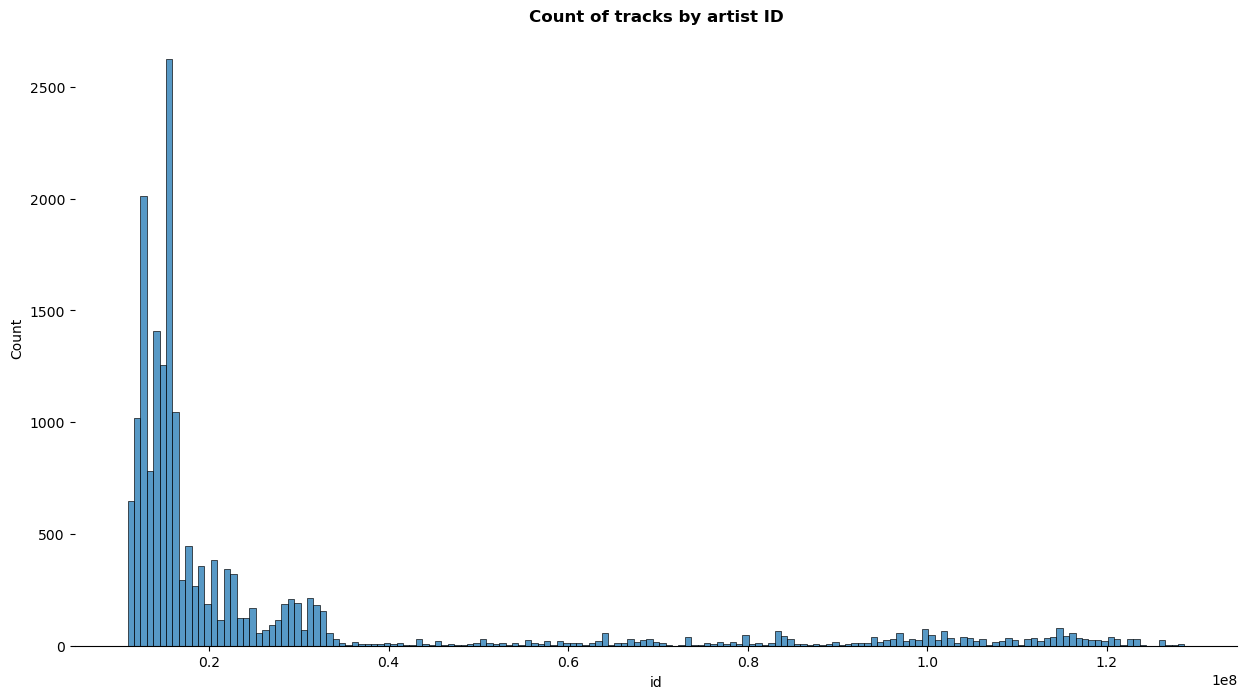

In [35]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.histplot(x = 'id', data = artist_tracks_df)

plt.title('Count of tracks by artist ID', fontweight='bold')

plt.show()

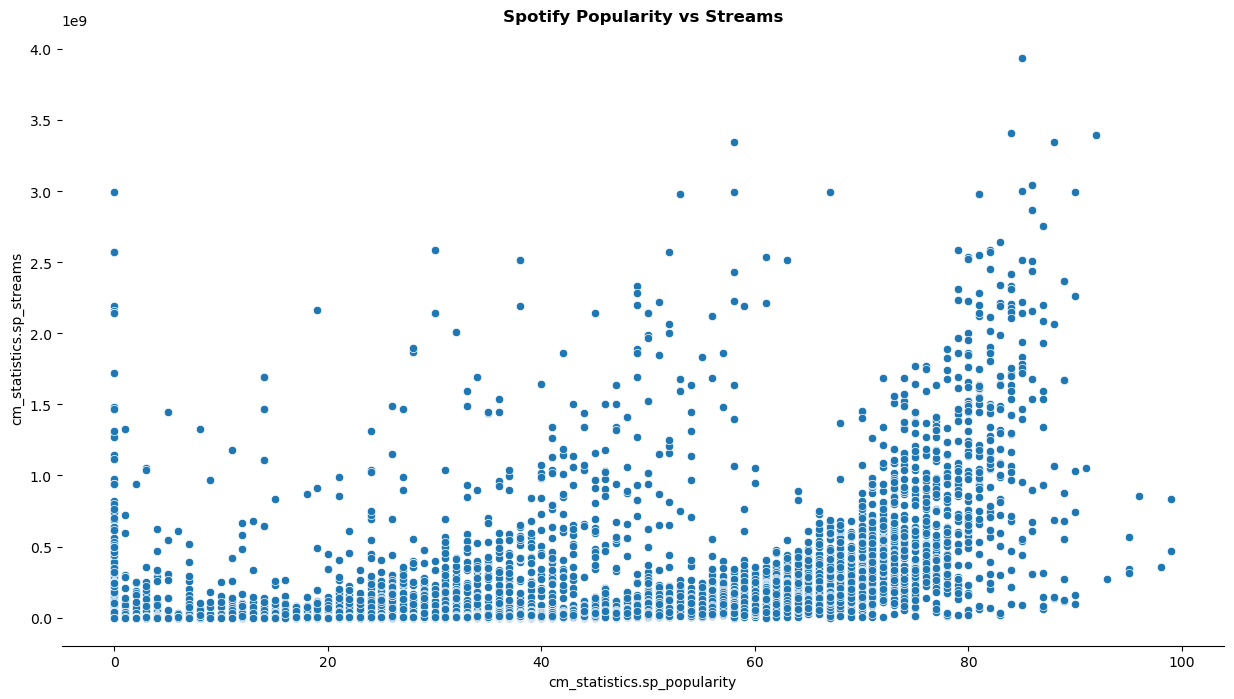

In [36]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.scatterplot(x = 'cm_statistics.sp_popularity',y = 'cm_statistics.sp_streams',data = artist_tracks_df)

plt.title('Spotify Popularity vs Streams', fontweight='bold')

plt.show()

## Combine Data

In [37]:
# Load the data from the CSV files if needed (will be commented out until needed)
#artist_tracks_df = pd.read_csv('CSVs/artist_tracks_df.csv')
#tracks_df = pd.read_csv('CSVs/tracks_df.csv')
#youtube_df = pd.read_csv('CSVs/youtube_df.csv')

# Add 'yt_' prefix to each column in youtube_df except for the merge key 'cm_track'
youtube_df = youtube_df.set_index('cm_track').add_prefix('yt_').reset_index()

# Add 'IsHit' column set to 1 for youtube_df and tracks_df
youtube_df['IsHit'] = 1
tracks_df['IsHit'] = 1

# Merging artist_tracks_df with tracks_df
merged_df_1 = pd.merge(artist_tracks_df, tracks_df, on='cm_track', how='left')

# Merging the result with youtube_df
final_df = pd.merge(merged_df_1, youtube_df, on='cm_track', how='left')

# Create 'cm_track_id' by combining 'id_x' and 'cm_track' if they are the same, otherwise use 'cm_track'
final_df['cm_track_id'] = final_df.apply(lambda row: row['cm_track'] if row['cm_track'] == row['id_x'] else row['cm_track'], axis=1)

# Ensure 'cm_track_id' is the first column by reordering the DataFrame
columns = ['cm_track_id'] + [col for col in final_df.columns if col not in ['cm_track_id', 'id_x', 'cm_track']]
final_df = final_df[columns]

# Drop the specified columns
columns_to_drop = [
    'artist_covers_x', 'itunes_track_ids', 'itunes_album_ids', 'deezer_track_ids', 
    'deezer_album_ids', 'deezer_duration', 'amazon_track_ids', 'amazon_album_ids', 
    'created_at', 'modified_at', 'description', 'cm_audio_features.acousticness', 
    'cm_audio_features.danceability', 'cm_audio_features.energy', 
    'cm_audio_features.instrumentalness', 'cm_audio_features.key', 
    'cm_audio_features.liveness', 'cm_audio_features.loudness', 
    'cm_audio_features.mode', 'cm_audio_features.speechiness', 
    'cm_audio_features.tempo', 'cm_audio_features.valence', 'id_y'
]
final_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Merge and rename columns
# Merge 'cm_statistics.sp_popularity' and 'spotify_popularity', giving precedence to non-null values from the first
final_df['spotify_popularity'] = final_df['cm_statistics.sp_popularity'].combine_first(final_df['spotify_popularity'])
final_df.drop(columns=['cm_statistics.sp_popularity'], inplace=True)

# Merge 'image_url_x' and 'image_url_y' into 'image_url'
final_df['image_url'] = final_df['image_url_x'].combine_first(final_df['image_url_y'])
final_df.drop(columns=['image_url_x', 'image_url_y'], inplace=True)

# Merge 'isrc_x' and 'isrc_y' into 'isrc'
final_df['isrc'] = final_df['isrc_x'].combine_first(final_df['isrc_y'])
final_df.drop(columns=['isrc_x', 'isrc_y'], inplace=True)

# Optionally, inspect the first few rows to ensure the merge and new column were successful
print(final_df.head())

# Save the final merged DataFrame to a new CSV file
final_df.to_csv('CSVs/merged_CM_Track_data.csv', index=False)

print("DataFrame saved to 'merged_CM_Track_data.csv'")

# Print all header column names of the new file
print("Header Column Names of the Final DataFrame:")
print(final_df.columns.tolist())


   cm_track_id artist_type                    cm_artist_x  \
0     11597863        main  [2762, 215034, 602557, 48357]   
1     11597864        main                  [2762, 48357]   
2     12619780        main                         [2762]   
3     13062145        main                 [2762, 116833]   
4     13062146        main                         [2762]   

                                      artist_names_x              code2s_x  \
0  [Taylor Swift, Max Martin, Shellback, B. Kudan...  [US, US, None, None]   
1                      [Taylor Swift, B. Kudanowski]            [US, None]   
2                                     [Taylor Swift]                  [US]   
3                        [Taylor Swift, Digital Dog]            [US, None]   
4                                     [Taylor Swift]                  [US]   

                                     artist_images_x  \
0  [https://share.chartmetric.com/artists/299/172...   
1  [https://share.chartmetric.com/artists/299/172...

## Check which duplicate columns to delete & clean up data

In [38]:
# Load the data from the CSV file if needed (will be commented out until needed)
#final_df = pd.read_csv('CSVs/merged_CM_Track_data.csv', low_memory=False)

# Define the column pairs and new column names
column_pairs = {
    ('cm_artist_x', 'cm_artist_y'): 'cm_artist',
    ('artist_names_x', 'artist_names_y'): 'artist_names',
    ('code2s_x', 'code2s_y'): 'region_codes',
    ('artist_images_x', 'artist_images_y'): 'artist_images',
    ('spotify_track_ids_x', 'spotify_track_ids_y'): 'spotify_track_ids',
    ('spotify_album_ids_x', 'spotify_album_ids_y'): 'spotify_album_ids',
    ('spotify_duration_ms_x', 'spotify_duration_ms_y'): 'track_duration',
    ('album_ids_x', 'album_ids_y'): 'album_ids',
    ('album_names_x', 'album_names_y'): 'album_names',
    ('album_upc_x', 'album_upc_y'): 'album_upc',
    ('album_label_x', 'album_label_y'): 'album_label',
    ('release_dates_x', 'release_dates_y'): 'release_dates',
    ('name_x', 'name_y'): 'name',
    ('IsHit_x', 'IsHit_y'): 'IsHit'
}

# Process each pair of columns
for (col_x, col_y), new_col in column_pairs.items():
    # Merge the values from _x and _y columns into the new column
    final_df[new_col] = final_df[col_x].combine_first(final_df[col_y])

    # Drop the original _x and _y columns
    final_df.drop(columns=[col_x, col_y], inplace=True)

# Save the modified DataFrame back to a new CSV file
final_df.to_csv('CSVs/updated_merged_CM_Track_data.csv', index=False)

print("Updated file saved as 'updated_merged_CM_Track_data.csv'.")


Updated file saved as 'updated_merged_CM_Track_data.csv'.


In [40]:
# Load the data from the CSV file if needed (will be commented out until needed)
#df = pd.read_csv('CSVs/updated_merged_CM_Track_data.csv', low_memory=False)

#Make copy of final_df
df = final_df.copy()

# Specify the new order of columns as a list
new_column_order = [
    'cm_track_id', 'isrc', 'name', 'IsHit', 'cm_artist', 'artist_names', 'artist_type',
    'artist_images', 'image_url', 'release_dates', 'region_codes', 'track_duration',
    'duration_ms', 'duration', 'track_genre', 'tags', 'storefronts', 'explicit', 'score',
    'velocity', 'spotify_artist_ids', 'spotify_artist_names', 'spotify_popularity',
    'spotify_album_id', 'spotify_album_ids', 'album', 'cm_statistics.cm_track',
    'cm_statistics.de_playlist_total_reach', 'cm_statistics.num_am_editorial_playlists',
    'cm_statistics.num_am_playlists', 'cm_statistics.num_az_editorial_playlists',
    'cm_statistics.num_az_playlists', 'cm_statistics.num_de_editorial_playlists',
    'cm_statistics.num_de_playlists', 'cm_statistics.num_sp_editorial_playlists',
    'cm_statistics.num_sp_playlists', 'cm_statistics.num_tt_videos',
    'cm_statistics.num_yt_editorial_playlists', 'cm_statistics.num_yt_playlists',
    'cm_statistics.sp_playlist_total_reach', 'cm_statistics.sp_streams',
    'cm_statistics.yt_playlist_total_reach', 'artist_covers_y', 'composer_name',
    'songwriter', 'artists', 'rank', 'added_at', 'chart_type', 'chart_name', 'current_plays',
    'code2', 'spotify', 'pre_rank', 'peak_rank', 'peak_date', 'time_on_chart', 'rankStats',
    'yt_youtube_artist', 'yt_image_url', 'yt_upload_date', 'yt_license', 'yt_album_names',
    'yt_youtube_artist_names', 'yt_cm_artist', 'yt_artist_names', 'yt_code2s',
    'yt_artist_images', 'yt_artist_covers', 'yt_youtube_artist_ids', 'yt_youtube_track_ids',
    'yt_composer_name', 'yt_album', 'yt_duration_ms', 'yt_explicit', 'yt_score',
    'yt_songwriter', 'yt_spotify_popularity', 'yt_album_ids', 'yt_album_upc', 'yt_album_label',
    'yt_artists', 'yt_youtube_track_id', 'yt_youtube_artist_name', 'yt_youtube_artist_cm_artist',
    'yt_position', 'yt_added_at', 'yt_view_count', 'yt_raw_data', 'yt_velocity',
    'yt_pre_rank', 'yt_peak_rank', 'yt_peak_date', 'yt_time_on_chart', 'yt_rankStats',
    'yt_viewStats', 'album_ids', 'album_names', 'album_upc', 'album_label'
]

# Reorder the DataFrame according to the new column order, handling any missing columns
df = df[[col for col in new_column_order if col in df.columns]]

# Save the reordered DataFrame back to a new CSV file
df.to_csv('CSVs/reordered_updated_merged_CM_Track_data.csv', index=False)

print("Reordered file saved as 'reordered_updated_merged_CM_Track_data.csv'.")


Reordered file saved as 'reordered_updated_merged_CM_Track_data.csv'.


## Back Assign Popular Songs based on their YouTube & Spotify Popularity so that we know if past songs were IsHit=1

In [41]:
# Load the data from the CSV file if needed (will be commented out until needed)
#df = pd.read_csv('CSVs/reordered_updated_merged_CM_Track_data.csv', low_memory=False)

# Define popularity thresholds
SPOTIFY_POPULARITY_THRESHOLD = 50
SPOTIFY_STREAMS_THRESHOLD = 5000000
SPOTIFY_PLAYLISTS_THRESHOLD = 1000000
YOUTUBE_REACH_THRESHOLD = 1000000

# Initialize IsHit column to 0
df['IsHit'] = 0

# Check conditions and update IsHit accordingly
if 'spotify_popularity' in df.columns:
    df.loc[df['spotify_popularity'] >= SPOTIFY_POPULARITY_THRESHOLD, 'IsHit'] = 1
if 'cm_statistics.sp_streams' in df.columns:
    df.loc[df['cm_statistics.sp_streams'] >= SPOTIFY_STREAMS_THRESHOLD, 'IsHit'] = 1
if 'cm_statistics.sp_playlist_total_reach' in df.columns:
    df.loc[df['cm_statistics.sp_playlist_total_reach'] >= SPOTIFY_PLAYLISTS_THRESHOLD, 'IsHit'] = 1
if 'cm_statistics.yt_playlist_total_reach' in df.columns:
    df.loc[df['cm_statistics.yt_playlist_total_reach'] >= YOUTUBE_REACH_THRESHOLD, 'IsHit'] = 1    
    
    
# Save the modified DataFrame back to a new CSV file
df.to_csv('CSVs/AlmostFinal_CM_consolidatedTracksForML.csv', index=False)

print("File updated and saved as 'AlmostFinal_CM_consolidatedTracksForML.csv'.")


File updated and saved as 'AlmostFinal_CM_consolidatedTracksForML.csv'.


In [42]:
# Load the data from CSV
#df = pd.read_csv('CSVs/AlmostFinal_CM_consolidatedTracksForML.csv',low_memory=False)

# Define the new order of the columns, removing 'id' and any other unspecified columns
new_column_order = [
    'cm_track_id', 'isrc', 'name', 'IsHit', 'cm_artist', 'artist_names',
    'spotify_popularity', 'score', 'track_genre', 'image_url',
    'artist_images', 'spotify_artist_ids', 'explicit', 'region_codes'
]

# Reorder the DataFrame to include only the specified columns (this will drop all other columns)
df = df[new_column_order]

# Save the modified DataFrame back to CSV
df.to_csv('CSVs/final_CM_consolidatedTracksForML.csv', index=False)

print("Updated file saved successfully.")


Updated file saved successfully.
